In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
plt.rcParams['figure.figsize'] = [9, 5]
plt.rcParams['figure.dpi'] = 100

class EMAFilter:
    def __init__(self, alpha):
        self.alpha = alpha
        self.filtered_value = None

    def update(self, new_value):
        if self.filtered_value is None:
            self.filtered_value = new_value
        else:
            self.filtered_value = (1 - self.alpha) * self.filtered_value + self.alpha * new_value
        return self.filtered_value

# Create an EMA filter instance with a smoothing factor (alpha)
ema_filter = EMAFilter(alpha=0.1)

# Simulate noisy data
noisy_data = [10, 12, 15, 8, 20, 18, 22, 14, 16, 25]

# Apply the EMA filter to smooth out the noisy data
smoothed_data = [ema_filter.update(value) for value in noisy_data]

In [2]:
import csv

def visualize_data(file):
    with open(file) as csvfile:
        data = list(csv.reader(csvfile))

    pressure = np.array([float(data[i][0]) for i in range(1,len(data))])
    mass = np.array([float(data[i][1]) for i in range(1,len(data))])

    plt.scatter(pressure, mass)

def plot_linear_regr(file):
    import scipy
    from scipy import stats

    with open(file) as csvfile:
        data = list(csv.reader(csvfile))

    pressure = np.array([float(data[i][0]) for i in range(1,len(data))])
    mass = np.array([float(data[i][1]) for i in range(1,len(data))])

    slope, intercept, r_value, p_value, std_err = stats.linregress(pressure, mass)
    accuracy = r_value**2 * 100
    print(f'Regression Accuracy: {accuracy:0.1f}%\nr^2: {r_value**2}')
    plt.scatter(pressure, mass, marker=".")
    x = np.linspace(pressure.min(), pressure.max(),10000)
    plt.plot(x,slope*x + intercept, color="orange")
    plt.ylabel("Mass (g)")
    plt.xlabel("Pressure (psi)")
    plt.title("BPH Sensor Pressure Calibration Curve")
    plt.show()
    print(f'Equation: mass = {slope}*pressure + {intercept}')
    # error = [abs((slope*pressure[i] + intercept) - mass[i])/mass[i]*100 for i in range(len(pressure))]
    # for i in range(len(error)):
    #     print(f'{error[i]:0.1f}%')

# Test 1

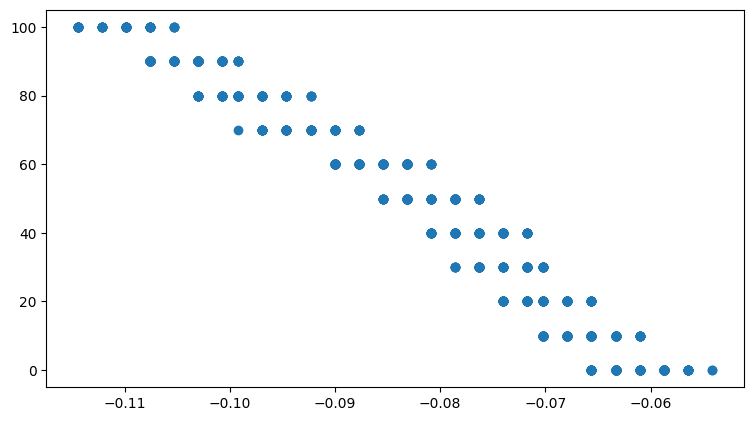

In [3]:
visualize_data('diffpress.csv')

Regression Accuracy: 95.7%
r^2: 0.9571905759141296


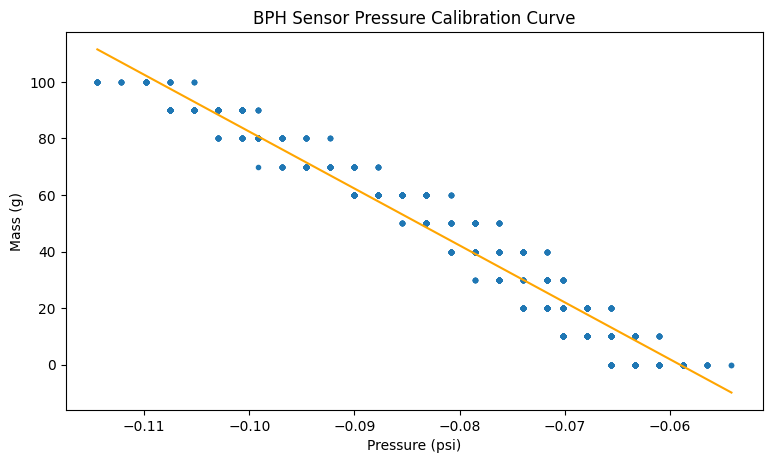

Equation: mass = -2014.3882135158285*pressure + -119.00032521053421


In [4]:
plot_linear_regr('diffpress.csv')

1403


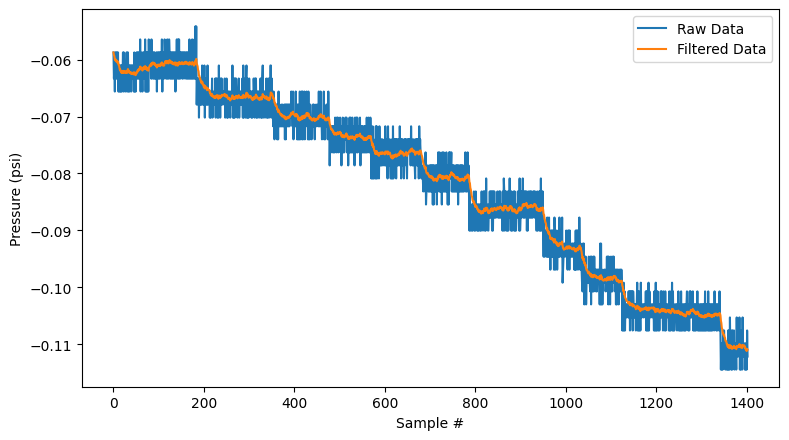

Regression Accuracy: 98.3%
r^2: 0.9830595685390784


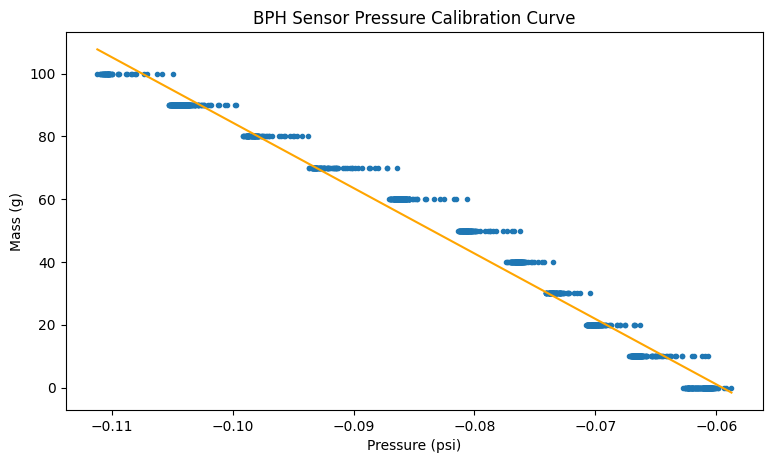

Equation: mass = -2083.9823605192223*pressure + -124.02160549374975


In [14]:
with open('diffpress.csv') as csvfile:
        data = list(csv.reader(csvfile))

pressure = np.array([float(data[i][0]) for i in range(1,len(data))])
mass = np.array([float(data[i][1]) for i in range(1,len(data))])
sample = np.array([i for i in range(len(mass))])

print(len(sample))

ema_filter = EMAFilter(alpha=0.1)
cleaned_pressure = np.array([ema_filter.update(value) for value in [float(data[i][0]) for i in range(1,len(data))]])

plt.plot(sample, pressure, label="Raw Data")
plt.plot(sample, cleaned_pressure, label="Filtered Data")
plt.legend()
plt.xlabel("Sample #")
plt.ylabel("Pressure (psi)")
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(cleaned_pressure, mass)
accuracy = r_value**2 * 100
print(f'Regression Accuracy: {accuracy:0.1f}%\nr^2: {r_value**2}')
plt.scatter(cleaned_pressure, mass, marker=".")
x = np.linspace(cleaned_pressure.min(), cleaned_pressure.max(),10000)
plt.plot(x,slope*x + intercept, color="orange")
plt.ylabel("Mass (g)")
plt.xlabel("Pressure (psi)")
plt.title("BPH Sensor Pressure Calibration Curve")
plt.show()
print(f'Equation: mass = {slope}*pressure + {intercept}')

import pandas as pd
data_csv = [0]*len(sample)
for i in range(len(sample)):
        data_csv[i] = [sample[i], pressure[i], cleaned_pressure[i]]

df = pd.DataFrame(data_csv, columns=["Sample", "Pressure (Raw)", "Pressure (EMA Filtered)"])
df.to_csv("differential_pressure_data.csv", index=False)

# Automated Mass Measurement

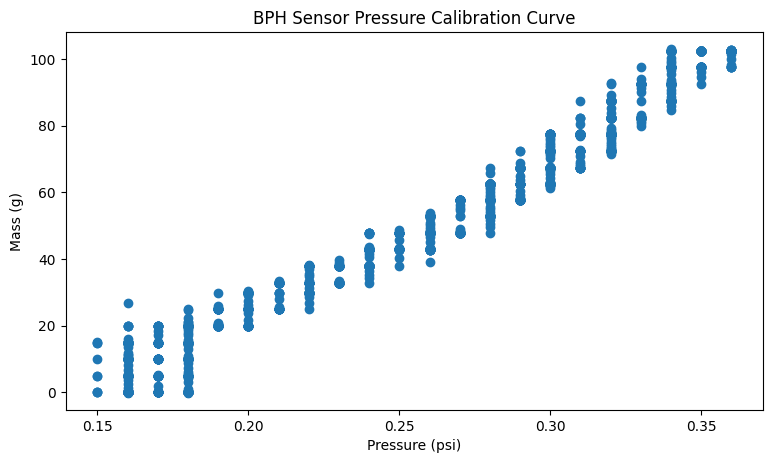

In [13]:
file = "dp_test1.csv"
with open(file) as csvfile:
        data = list(csv.reader(csvfile))

pressure = abs(np.array([float(data[i][2]) for i in range(1,len(data))]))
mass = np.array([float(data[i][3]) for i in range(1,len(data))])

plt.scatter(pressure, mass)
plt.xlabel("Pressure (psi)")
plt.ylabel("Mass (g)")
plt.title("BPH Sensor Pressure Calibration Curve")
plt.show()

Regression Accuracy: 96.7%
r^2: 0.967224126996602


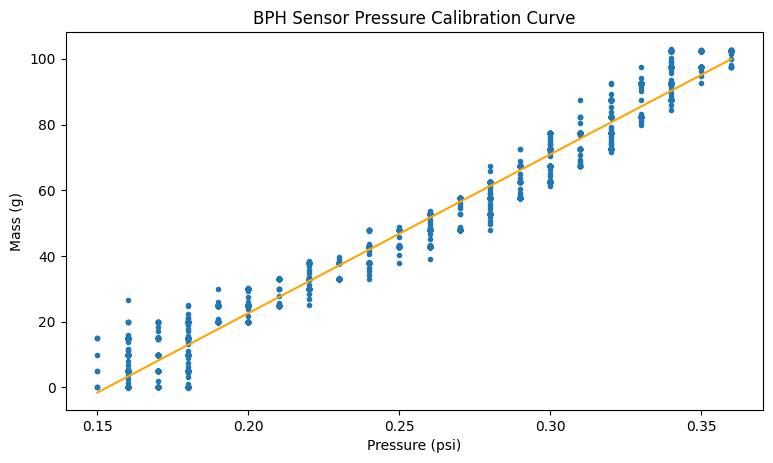

Equation: mass = 483.50070572437585*pressure + -74.09784730840474


In [17]:
import scipy
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(pressure, mass)
accuracy = r_value**2 * 100
print(f'Regression Accuracy: {accuracy:0.1f}%\nr^2: {r_value**2}')
plt.scatter(pressure, mass, marker=".")
x = np.linspace(pressure.min(), pressure.max(),10000)
plt.plot(x,slope*x + intercept, color="orange")
plt.ylabel("Mass (g)")
plt.xlabel("Pressure (psi)")
plt.title("BPH Sensor Pressure Calibration Curve")
plt.show()
print(f'Equation: mass = {slope}*pressure + {intercept}')

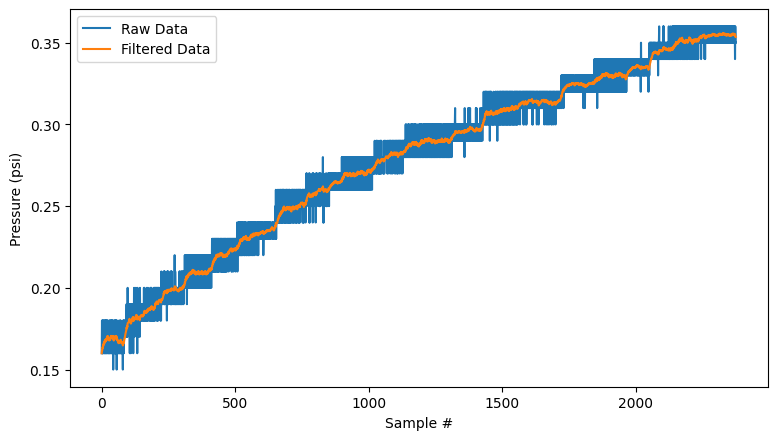

Regression Accuracy: 97.9%
r^2: 0.9791837891378674


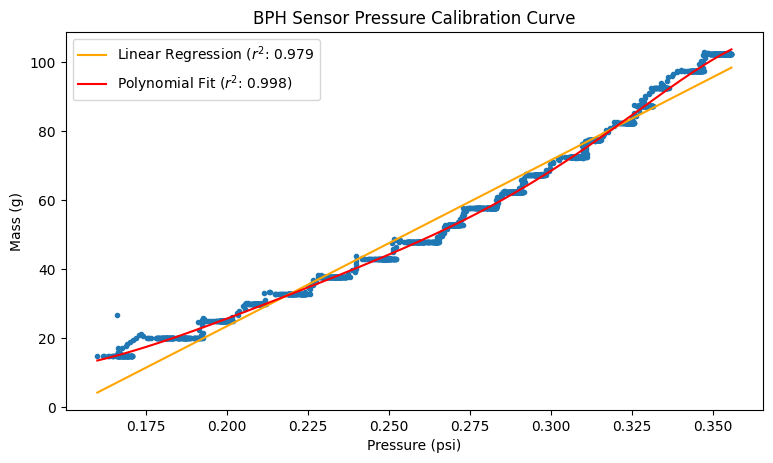

Linear Regression Equation: mass = 481.15103659231863*pressure + -72.72220157323946
Polynomial Fit Equation: mass = -3564299.3605022547 + 4442303.036103057*pressure + -2159256.733360542*pressure^2 + 510300.13317238336*pressure^3 + -57238.62389109565*pressure^4 + 2412.0533667816267*pressure^5 + 11.82389224210723*pressure^6
Polynomial Fit Accuracy: 99.7915577254461%


In [36]:
ema_filter = EMAFilter(alpha=0.1)
cleaned_pressure = np.array([ema_filter.update(value) for value in pressure[500:]])
sample = np.array([i for i in range(len(cleaned_pressure))])

plt.plot(sample, pressure[500:], label="Raw Data")
plt.plot(sample, cleaned_pressure, label="Filtered Data")
plt.legend()
plt.xlabel("Sample #")
plt.ylabel("Pressure (psi)")
plt.show()

p = np.polyfit(cleaned_pressure, mass[500:], 6)

def calculate_r_squared(p, x, y):
    y_pred = np.polyval(p, x)
    ss_total = np.sum((y - np.mean(y))**2)
    ss_residual = np.sum((y - y_pred)**2)
    r_squared = 1 - (ss_residual / ss_total)    
    return r_squared

pr = calculate_r_squared(p, cleaned_pressure, mass[500:])*100

slope, intercept, r_value, p_value, std_err = stats.linregress(cleaned_pressure, mass[500:])
accuracy = r_value**2 * 100
print(f'Regression Accuracy: {accuracy:0.1f}%\nr^2: {r_value**2}')
plt.scatter(cleaned_pressure, mass[500:], marker=".")
x = np.linspace(cleaned_pressure.min(), cleaned_pressure.max(),10000)
plt.plot(x,slope*x + intercept, color="orange",label=f"Linear Regression ($r^2$: {accuracy/100:0.3f}")
plt.plot(x,np.polyval(p,x), color="red",label=f"Polynomial Fit ($r^2$: {pr/100:0.3f})")
plt.ylabel("Mass (g)")
plt.xlabel("Pressure (psi)")
plt.title("BPH Sensor Pressure Calibration Curve")
plt.legend()
plt.show()
print(f'Linear Regression Equation: mass = {slope}*pressure + {intercept}')
print(f'Polynomial Fit Equation: mass = {p[0]} + {p[1]}*pressure + {p[2]}*pressure^2 + {p[3]}*pressure^3 + {p[4]}*pressure^4 + {p[5]}*pressure^5 + {p[6]}*pressure^6\nPolynomial Fit Accuracy: {pr}%')